In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import seaborn as sns

In [34]:
titanic_ds=pd.read_csv('train.csv')

In [35]:
titanic_ds.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Who were the passengers on the ship(Name,Age,Class etc..)
import matplotlib.pyplot as plt
%matplotlib inline

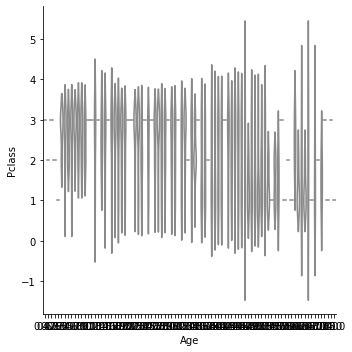

In [6]:
sns.catplot(data=titanic_ds, x="Age", y="Pclass", kind="violin", color=".9", inner=None)

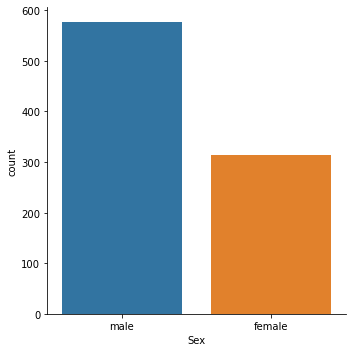

In [7]:
#catplot allows to pass a coloumn as a argument
sns.catplot(x ="Sex",kind ="count", data = titanic_ds)#Kind can be count only when one of arguments x,y is null.
#no of women onboard was approximately half of men.

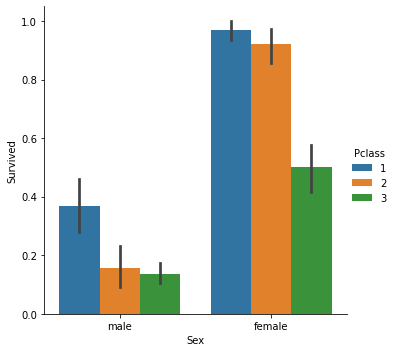

In [8]:
sns.catplot(x ="Sex",y="Survived",kind ="bar",hue='Pclass', data = titanic_ds)
#the hue parameter determines which column in the data frame should be used for colour encoding.
#More no of women survived accident than man and they belong primarly to class 1.

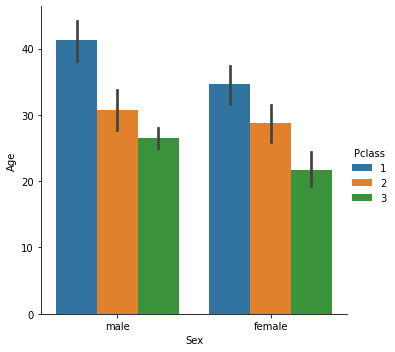

In [9]:
sns.catplot(x ="Sex",y="Age",kind ="bar",hue='Pclass', data = titanic_ds)

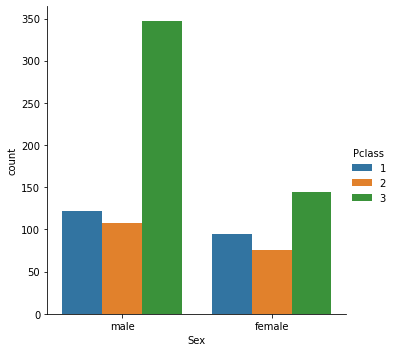

In [10]:
sns.catplot(x="Sex",kind ="count",hue='Pclass', data = titanic_ds)
#Most men belongs to the third class

In [63]:
def male_female_child(passenger):
    age,sex=passenger
    if age<16:
        return 'child'
    else:
        return sex
    

In [12]:
titanic_ds[['Age','Sex']].head(10)

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
3,35.0,female
4,35.0,male
5,NaN,male
6,54.0,male
7,2.0,male
8,27.0,female
9,14.0,female


In [64]:
titanic_ds['Person']=titanic_ds[['Age','Sex']].apply(male_female_child,axis=1)#axis 1 implies along the coloumn

<AxesSubplot:>

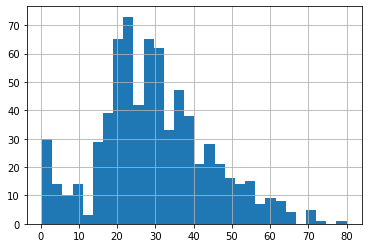

In [65]:
titanic_ds['Age'].hist(bins=30)

In [15]:
titanic_ds['Age'].mean()

29.69911764705882

In [16]:
titanic_ds['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

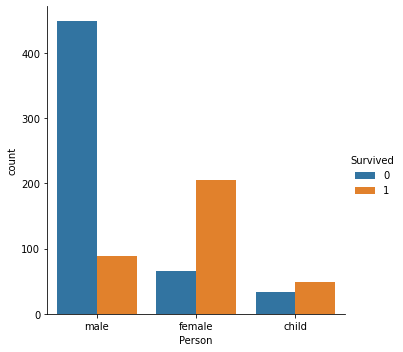

In [17]:
sns.catplot(x="Person",kind ="count",hue='Survived', data = titanic_ds)
#more no men died than women and child.Survival first line for women and children.

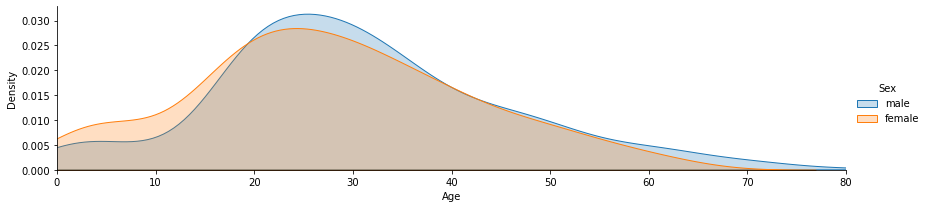

In [18]:
fig=sns.FacetGrid(titanic_ds,hue='Sex',aspect=4)#facetgrid allows us to draw multiple plots of same dataset
fig.map(sns.kdeplot,'Age',fill=True)#mapping kde plots from age coloumn.
oldest=titanic_ds['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

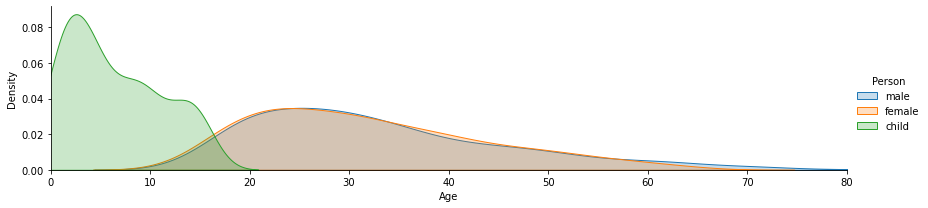

In [19]:
fig=sns.FacetGrid(titanic_ds,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest=titanic_ds['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

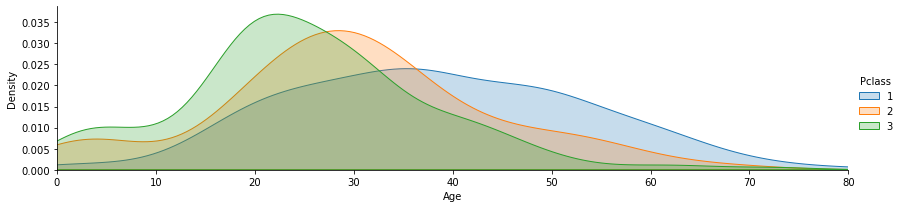

In [20]:
fig=sns.FacetGrid(titanic_ds,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',fill=True)
oldest=titanic_ds['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [21]:
#what deck the passengers where on and how is it related to their class?.Information about the room can be found in the cabin coloumn
deck=titanic_ds['Cabin'].dropna()#dropping the null values.
deck.head(10)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
Name: Cabin, dtype: object

In [22]:
levels=[]#grabbing the first letter from the cabin to identify the deck.
for level in deck:
    levels.append(level[0])

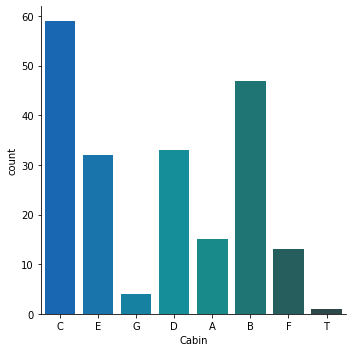

In [23]:
cabin_ds=DataFrame(levels)
cabin_ds.columns=['Cabin']
cabin_ds.head()
sns.catplot(data=cabin_ds,x='Cabin',kind='count',palette='winter_d')

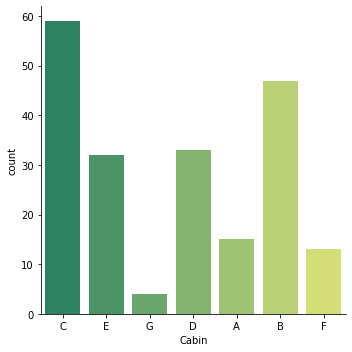

In [24]:
#we should remove the T cabin since it is not making much sense
cabin_ds=cabin_ds[cabin_ds!='T']
sns.catplot(data=cabin_ds,x='Cabin',kind='count',palette='summer')

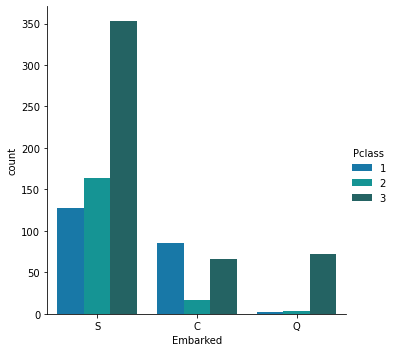

In [25]:
#we are interested to find where the people boarded and their class this would provide info about economy of the place.
sns.catplot(data=titanic_ds,x='Embarked',hue='Pclass',kind='count',palette='winter_d')

#Most of the people boarded from southampton

In [36]:
#Who were the people with family and who were alone in the ship
#if the siblings and parent/children coloumns are zero implies they came alone.
print(titanic_ds.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [48]:
titanic_ds['Alone']=titanic_ds['SibSp']+titanic_ds['Parch']

In [49]:
#consider the locations in the titanic 'Alone' status column where it is greater than 0 then set it to 'with family' string
titanic_ds['Alone'].loc[titanic_ds['Alone']>0]='with family'
titanic_ds['Alone'].loc[titanic_ds['Alone']==0]='Alone'

C:\Users\VaishakhRaveendran\AppData\Local\Temp\ipykernel_3668\852445453.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_ds['Alone'].loc[titanic_ds['Alone']>0]='with family'


In [50]:
print(titanic_ds['Alone'])

0      with family
1      with family
2            Alone
3      with family
4            Alone
          ...     
886          Alone
887          Alone
888    with family
889          Alone
890          Alone
Name: Alone, Length: 891, dtype: object


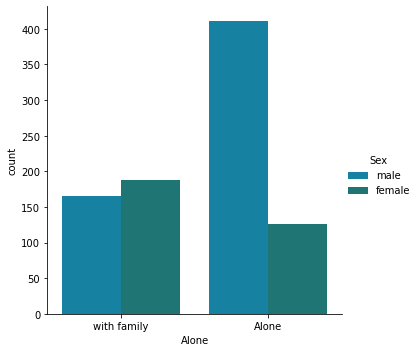

In [53]:
sns.catplot(data=titanic_ds,x='Alone',hue='Sex',kind='count',palette='winter_d')
#most of the men were alone

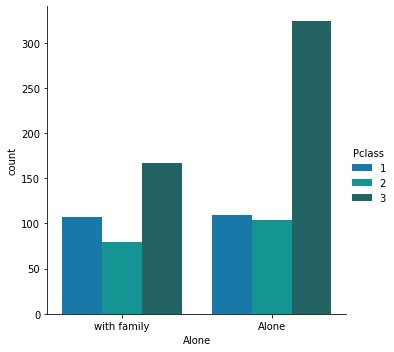

In [57]:
sns.catplot(data=titanic_ds,x='Alone',hue='Pclass',kind='count',palette='winter_d')
#most of the third class people came alone

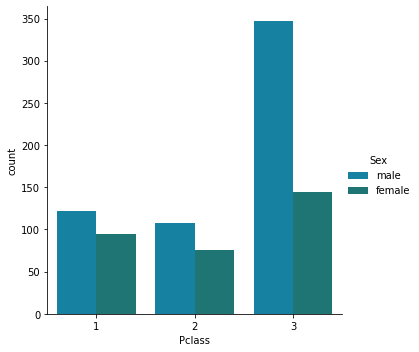

In [60]:
sns.catplot(data=titanic_ds,x='Pclass',hue='Sex',kind='count',palette='winter_d')
#Most of the third class people were men
#We can infer  majority of the third class men came alone

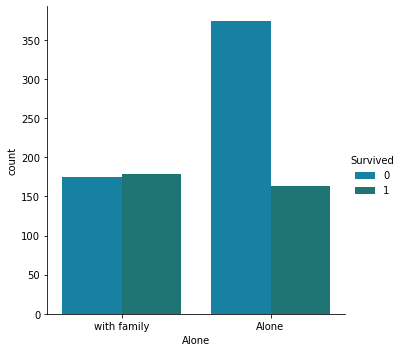

In [61]:
#what helped people survive the crash
sns.catplot(data=titanic_ds,x='Alone',hue='Survived',kind='count',palette='winter_d')
#Those who came alone died more compared to those who came with the family

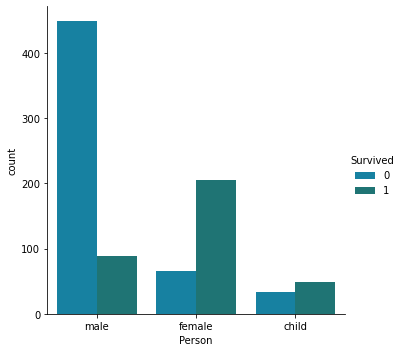

In [66]:
sns.catplot(data=titanic_ds,x='Person',hue='Survived',kind='count',palette='winter_d')
#women and children had better chance of survival

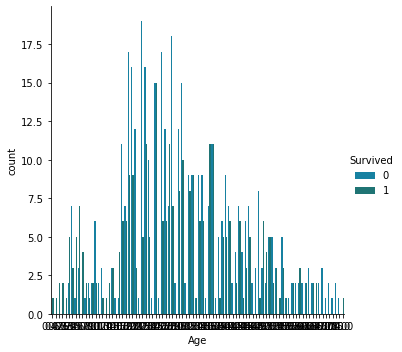

In [69]:
sns.catplot(data=titanic_ds,x='Age',hue='Survived',kind='count',palette='winter_d')

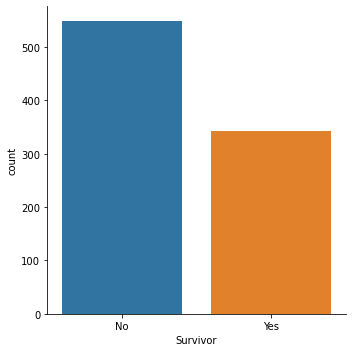

In [74]:
titanic_ds['Survivor']=titanic_ds['Survived'].map({0:'No',1:'Yes'})
sns.catplot(data=titanic_ds,x='Survivor',kind='count')
#checking which factors played important role in the survival of passengers 

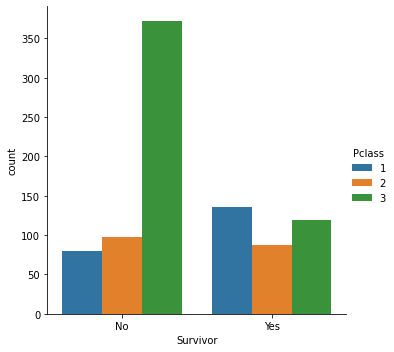

In [77]:
sns.catplot(data=titanic_ds,x='Survivor',hue='Pclass',kind='count')

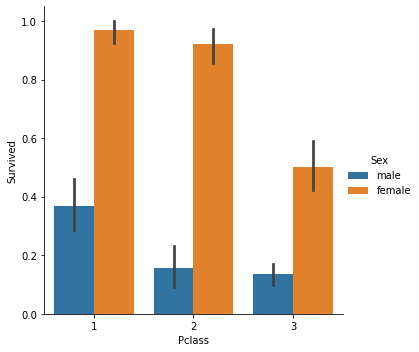

In [97]:
sns.catplot(data=titanic_ds,x='Pclass',y='Survived',hue='Sex',kind='bar')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

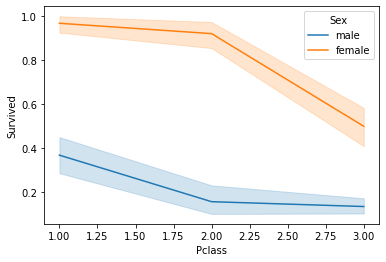

In [111]:
sns.lineplot(data=titanic_ds,x='Pclass',y='Survived',hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

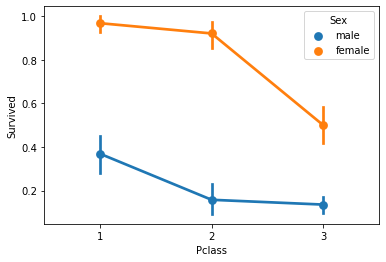

In [99]:
sns.pointplot(data=titanic_ds,x='Pclass',y='Survived',hue='Sex')
#being a man or being in third class could reduce your chance of survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

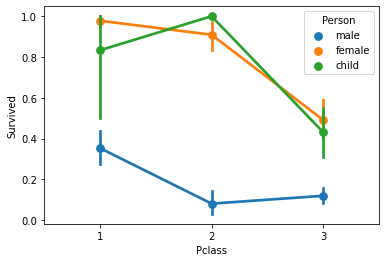

In [100]:
sns.pointplot(data=titanic_ds,x='Pclass',y='Survived',hue='Person')

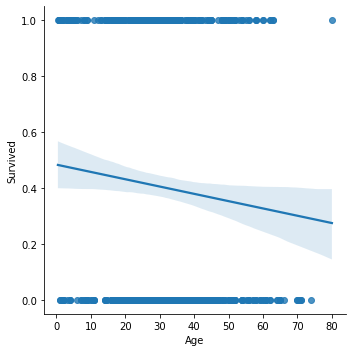

In [105]:
sns.lmplot(data=titanic_ds,x='Age',y='Survived')
#the line is drawn using different points in the graphs.The points are also plotted in the graphsb

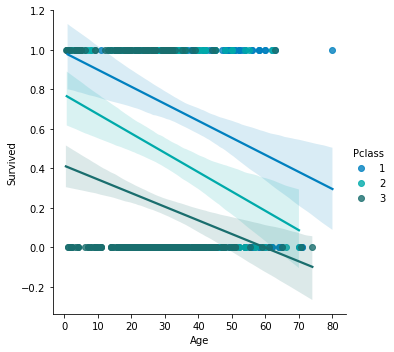

In [108]:
sns.lmplot(data=titanic_ds,x='Age',y='Survived',hue='Pclass',palette='winter_d')

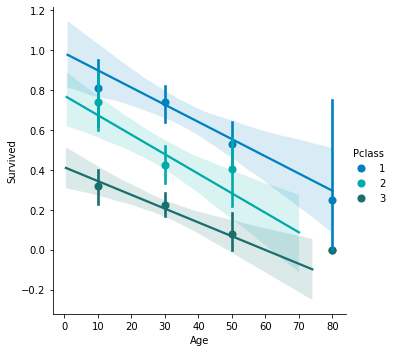

In [109]:
sns.lmplot(data=titanic_ds,x='Age',y='Survived',hue='Pclass',palette='winter_d',x_bins=[10,30,50,80])
#while drawing lmplot points are marked a line is drawn through points which are mostly collinearṭ

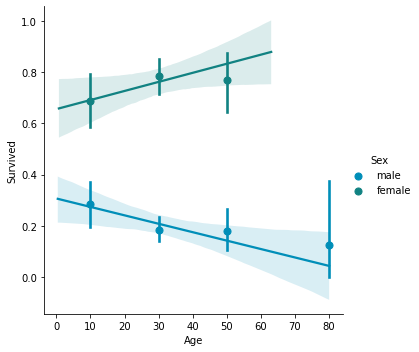

In [113]:
sns.lmplot(data=titanic_ds,x='Age',y='Survived',hue='Sex',palette='winter_d',x_bins=[10,30,50,80])
#it is interesting to see that older females have better rate for survival